In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('C:/Users/CARNIVAL/OneDrive/سطح المكتب/wind_dataset.csv')
df

,DATE,WIND,IND,RAIN,IND.1,T.MAX,IND.2,T.MIN,T.MIN.G
0,1961-01-01,13.67,0,0.2,0.0,9.5,0.0,3.7,-1.0
1,1961-01-02,11.50,0,5.1,0.0,7.2,0.0,4.2,1.1
2,1961-01-03,11.25,0,0.4,0.0,5.5,0.0,0.5,-0.5
3,1961-01-04,8.63,0,0.2,0.0,5.6,0.0,0.4,-3.2
4,1961-01-05,11.92,0,10.4,0.0,7.2,1.0,-1.5,-7.5
...,...,...,...,...,...,...,...,...,...
6569,1978-12-27,14.46,0,16.8,0.0,9.8,0.0,4.0,0.0
6570,1978-12-28,14.33,0,16.0,0.0,9.1,0.0,8.5,8.0
6571,1978-12-29,19.17,0,14.7,0.0,5.0,0.0,3.5,3.2
6572,1978-12-30,18.08,0,4.9,0.0,2.9,0.0,0.3,-0.5


# EDA

In [3]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6574 entries, 0 to 6573
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   DATE     6574 non-null   object 
 1   WIND     6574 non-null   float64
 2   IND      6574 non-null   int64  
 3   RAIN     6574 non-null   float64
 4   IND.1    6513 non-null   float64
 5   T.MAX    5953 non-null   float64
 6   IND.2    6513 non-null   float64
 7   T.MIN    5900 non-null   float64
 8   T.MIN.G  6214 non-null   float64
dtypes: float64(7), int64(1), object(1)
memory usage: 462.4+ KB


In [4]:
df.describe()

,WIND,IND,RAIN,IND.1,T.MAX,IND.2,T.MIN,T.MIN.G
count,6574.000000,6574.000000,6574.000000,6513.000000,5953.000000,6513.000000,5900.000000,6214.000000
mean,9.796834,0.391542,1.885169,0.356364,13.339123,0.464456,6.411678,2.736547
std,4.977272,1.179092,4.030529,1.128552,4.890546,1.177571,4.637243,5.569175
min,0.000000,0.000000,0.000000,0.000000,-0.100000,0.000000,-11.500000,-14.400000
25%,6.000000,0.000000,0.000000,0.000000,9.600000,0.000000,3.000000,-1.000000
50%,9.210000,0.000000,0.200000,0.000000,13.300000,0.000000,6.500000,3.000000
75%,12.960000,0.000000,2.000000,0.000000,17.200000,0.000000,10.000000,7.000000
max,30.370000,4.000000,67.000000,4.000000,26.800000,4.000000,18.000000,15.800000


In [5]:
df.duplicated().sum()


0

In [6]:
df.isnull().sum()


DATE         0
WIND         0
IND          0
RAIN         0
IND.1       61
T.MAX      621
IND.2       61
T.MIN      674
T.MIN.G    360
dtype: int64

In [7]:
colu = ["IND.1","T.MAX" ,"IND.2" ,"T.MIN" ,"T.MIN.G" ]
for i in colu:
    print(i)
    print(df[i].mode())

IND.1
0    0.0
dtype: float64
T.MAX
0    10.0
dtype: float64
IND.2
0    0.0
dtype: float64
T.MIN
0    9.0
dtype: float64
T.MIN.G
0    5.0
dtype: float64


In [8]:
FilterInd1 = 0.0
FilterTmax = 10.0
FilterInd =0.0
FilterTMIN = 9.0
FilterTMIN_g = 5.0
df["IND.1"].fillna(FilterInd1 , inplace = True)
df["T.MAX"].fillna(FilterTmax , inplace = True)
df["IND.2"].fillna(FilterInd , inplace = True)
df["T.MIN"].fillna(FilterTMIN , inplace = True)
df["T.MIN.G"].fillna(FilterTMIN_g , inplace = True)

## Fix "DATE" Column , Convert it to DateTime data type


In [9]:
df['DATE'] =pd.to_datetime(df['DATE'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6574 entries, 0 to 6573
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   DATE     6574 non-null   datetime64[ns]
 1   WIND     6574 non-null   float64       
 2   IND      6574 non-null   int64         
 3   RAIN     6574 non-null   float64       
 4   IND.1    6574 non-null   float64       
 5   T.MAX    6574 non-null   float64       
 6   IND.2    6574 non-null   float64       
 7   T.MIN    6574 non-null   float64       
 8   T.MIN.G  6574 non-null   float64       
dtypes: datetime64[ns](1), float64(7), int64(1)
memory usage: 462.4 KB


In [10]:
df["Year"] = df['DATE'].dt.year
df["month"] = df['DATE'].dt.month
df["day"] = df['DATE'].dt.day
df

,DATE,WIND,IND,RAIN,IND.1,T.MAX,IND.2,T.MIN,T.MIN.G,Year,month,day
0,1961-01-01,13.67,0,0.2,0.0,9.5,0.0,3.7,-1.0,1961,1,1
1,1961-01-02,11.50,0,5.1,0.0,7.2,0.0,4.2,1.1,1961,1,2
2,1961-01-03,11.25,0,0.4,0.0,5.5,0.0,0.5,-0.5,1961,1,3
3,1961-01-04,8.63,0,0.2,0.0,5.6,0.0,0.4,-3.2,1961,1,4
4,1961-01-05,11.92,0,10.4,0.0,7.2,1.0,-1.5,-7.5,1961,1,5
...,...,...,...,...,...,...,...,...,...,...,...,...
6569,1978-12-27,14.46,0,16.8,0.0,9.8,0.0,4.0,0.0,1978,12,27
6570,1978-12-28,14.33,0,16.0,0.0,9.1,0.0,8.5,8.0,1978,12,28
6571,1978-12-29,19.17,0,14.7,0.0,5.0,0.0,3.5,3.2,1978,12,29
6572,1978-12-30,18.08,0,4.9,0.0,2.9,0.0,0.3,-0.5,1978,12,30


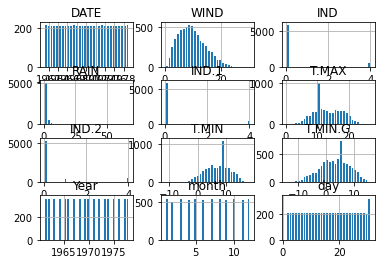

In [11]:
df.hist(bins = 30 , ec = "white")
plt.show()

### Is "Month" Has a relation with "Wind"



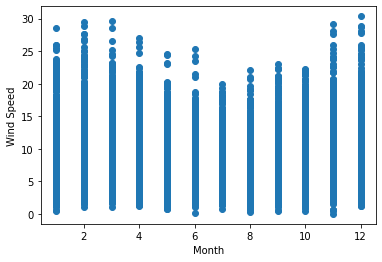

In [12]:
month = df["month"]
wind  = df['WIND']
plt.xlabel('Month')
plt.ylabel('Wind Speed')
plt.scatter(month , wind)
plt.show()

form this Scatter we found that: in (2,3,11,12) months the wind speed is high. , then we can estimate that it has a relation! , but we need some analysis to improve that


<AxesSubplot:>

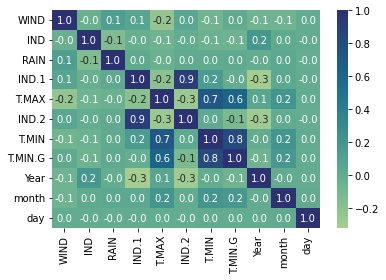

In [13]:
sns.heatmap(df.corr(), cmap="crest",annot=True, fmt=".1f")


### is tempreture has a relation with wind speed ?


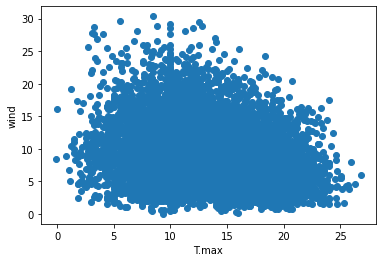

In [14]:
plt.xlabel("T.max")
plt.ylabel("wind")
plt.scatter(df['T.MAX'],wind)
plt.show()

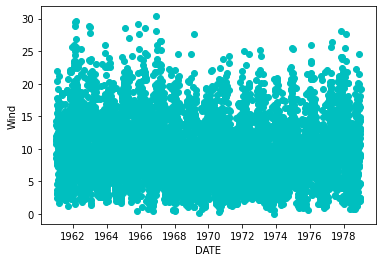

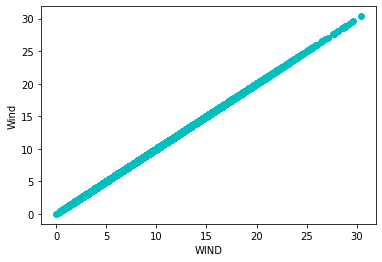

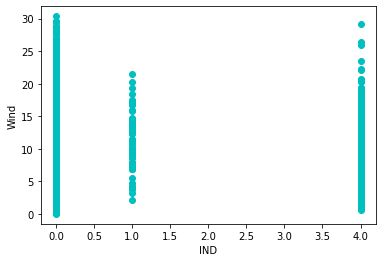

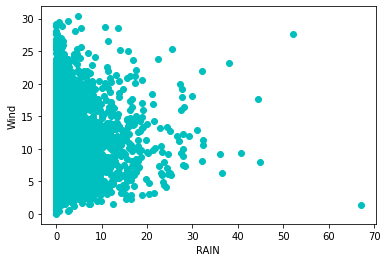

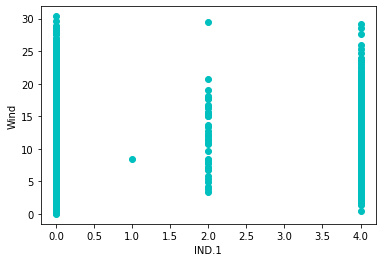

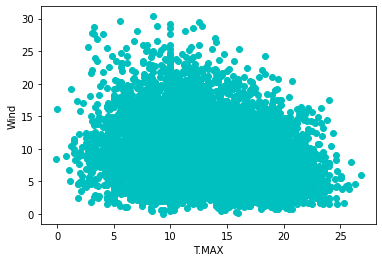

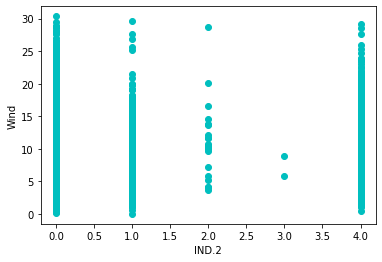

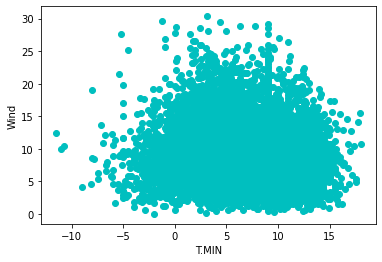

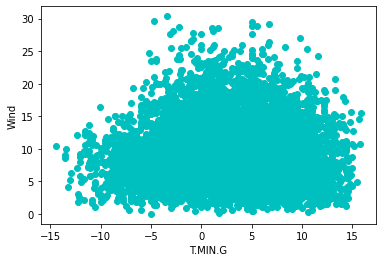

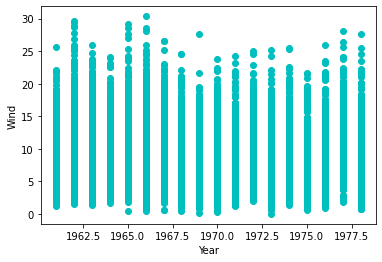

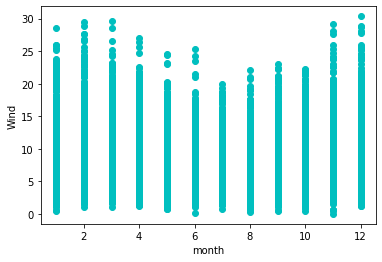

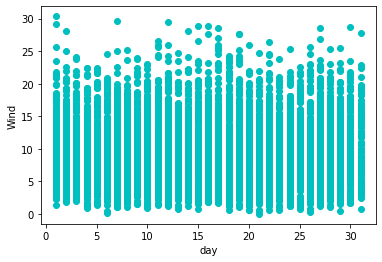

In [15]:
for i in df.columns:
    plt.xlabel(i)
    plt.ylabel("Wind")
    plt.scatter(df[i] , df["WIND"] ,color ="c")
    plt.show()

<AxesSubplot:xlabel='WIND'>

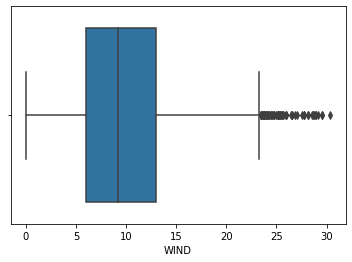

In [16]:
sns.boxplot(x=df['WIND'])


In [17]:
filter1 = (df['WIND'] >25) 
filter1.value_counts()

False    6538
True       36
Name: WIND, dtype: int64

In [18]:
for i in np.where(df["WIND"]>=23):
    df.drop(i,inplace = True)

### what is the best Month to turn on the Turbine


(array([ 196.,  794., 1084., 1209., 1106.,  814.,  595.,  387.,  211.,
         102.]),
 array([ 0.   ,  2.295,  4.59 ,  6.885,  9.18 , 11.475, 13.77 , 16.065,
        18.36 , 20.655, 22.95 ]),
 <BarContainer object of 10 artists>)

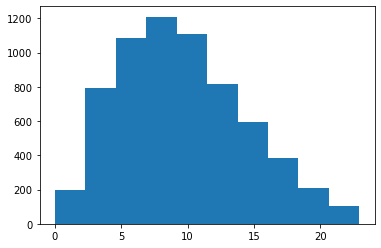

In [19]:
plt.hist(df["WIND"]) ## to get the most repeated value


In [20]:
filter2 =df[(df['WIND'] >=10)]
pd.DataFrame(filter2['month'].value_counts())

,month
1,332
12,325
3,300
11,263
2,261
4,247
10,234
9,193
5,192
6,156


The best Month to Turn ON Turbine is between (11 , 3) , beacuse we found that the maximum wind speed in these months and if we don't remove the outlier the output is same


In [21]:
filter3 =df[(df['WIND'] >=10) & (df["RAIN"]<=10)  ]
pd.DataFrame(filter3['month'].value_counts())

,month
1,311
12,303
3,285
11,251
2,250
4,234
10,222
5,185
9,176
6,154


If we add another columns , found that the best month is between(11,4)


but the best of the best is (12,1)

To conclusion this ...

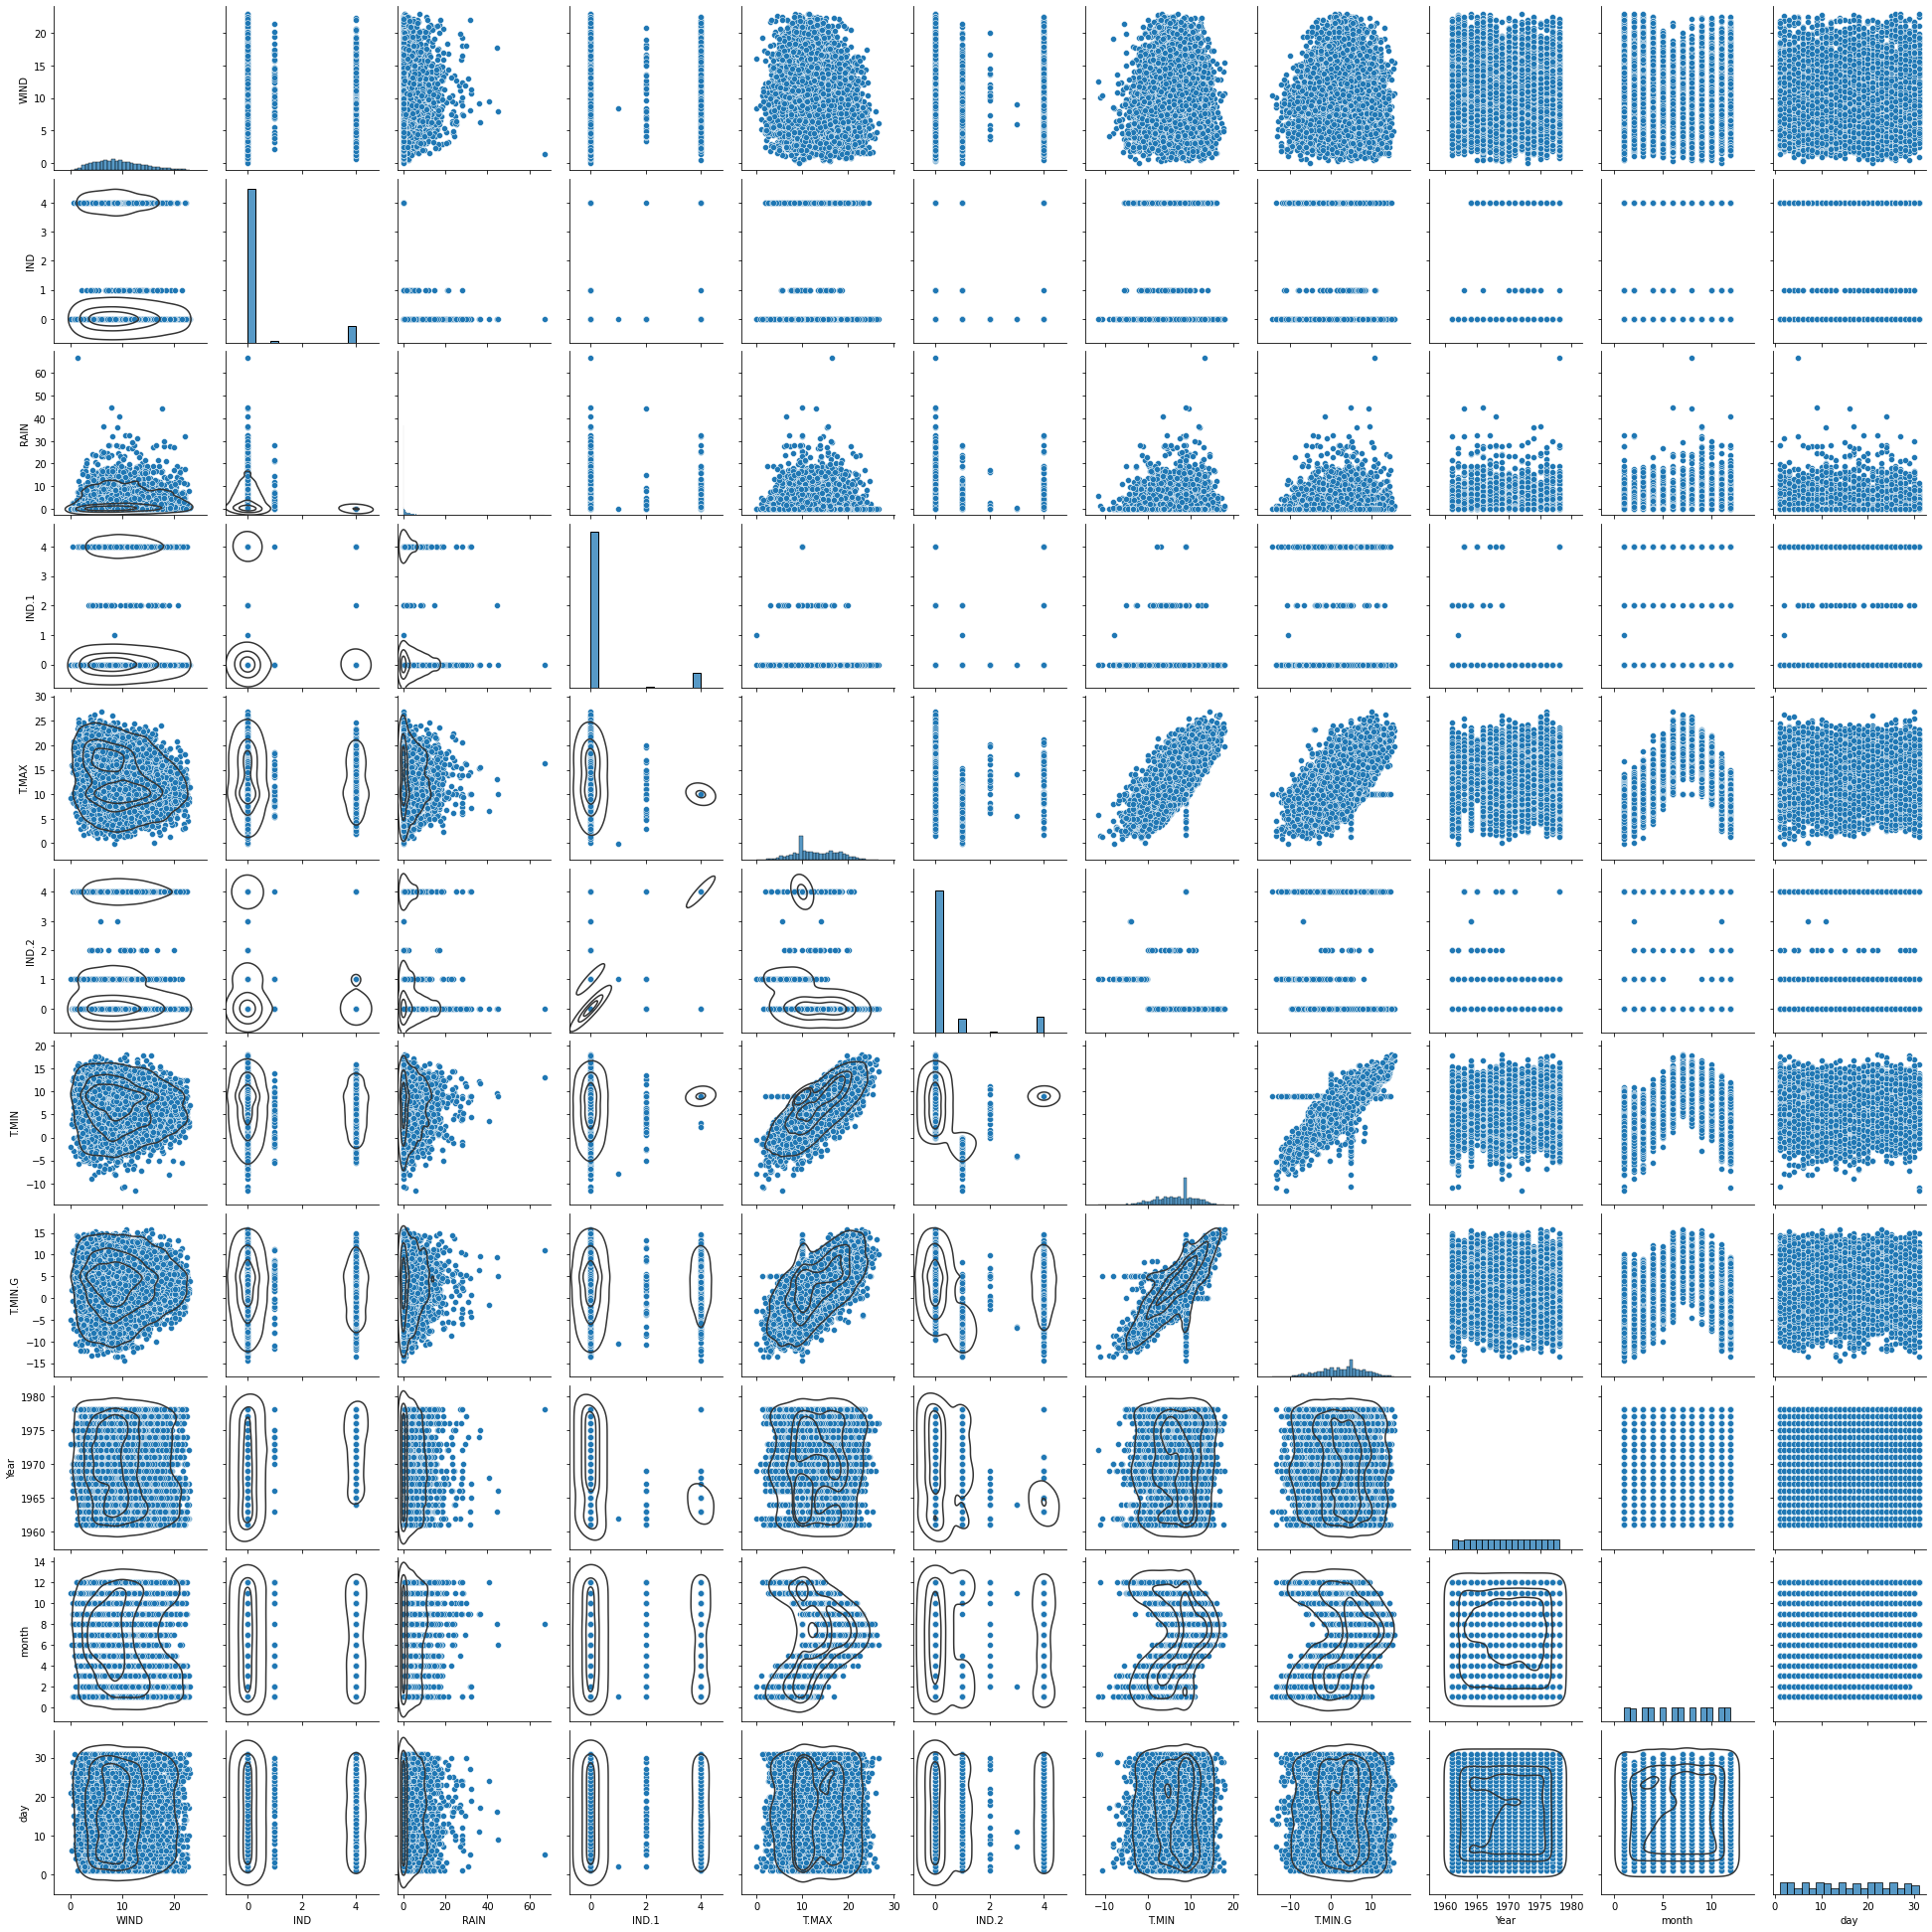

In [22]:
import seaborn as sns
g = sns.pairplot(data=df, diag_kind="hist", dropna=True)
g.map_lower(sns.kdeplot, levels=4, color=".2")

this is the correlation between all data with each other


In [23]:
df.drop("Year" ,axis =1 ,inplace =True)
df.drop("day" ,axis =1 ,inplace =True)
df.drop("DATE" ,axis =1 ,inplace =True)

In [24]:
X = df.drop('WIND',axis =1)
y = df["WIND"]

In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=0 ,shuffle=False)

In [30]:
from sklearn.tree import DecisionTreeRegressor
from sklearn import metrics
tree = DecisionTreeRegressor()
tree.fit(X_train,y_train)
predictTree = tree.predict(X_test)
print(tree.score(X_train,y_train))
print('MAE' ,metrics.mean_absolute_error(y_test, predictTree))
print('MSE:', metrics.mean_squared_error(y_test, predictTree))

0.9923526296379633
MAE 4.606699999999999
MSE: 33.883782064102554


In [29]:
x_input =pd.DataFrame(np.array([[0,10.4,0.0,7.2,1.0,-1.5,-7.5,1]]))  
tree.predict(x_input) 

array([11.92])